In [1]:
# First install PyMySQL
#!pip install pymysql


In [2]:

import pymysql
import pandas as pd

try:
    # Establish connection
    conn = pymysql.connect(
        host='localhost',
        user='root',         # Your MySQL username
        password='pratik',         # Your MySQL password
        database='tumor',   # make sure the database in loaded in your(MySQL)
        port=3306
    )
    
    # Load data into DataFrame
    query = "SELECT * FROM brain_tumor"  # Replace with your table
    df = pd.read_sql(query, conn)
    
    # Display results
    print("Connection successful! Here's your data:")
    display(df.head())
    
except pymysql.Error as e:
    print(f"MySQL Error: {e}")
    
finally:
    if 'conn' in locals():
        conn.close()
        print("Connection closed")

Connection successful! Here's your data:


C:\Users\Asus\AppData\Local\Temp\ipykernel_38952\718983894.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,MyUnknownColumn,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


Connection closed


In [3]:
df

,MyUnknownColumn,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,26,Female,Benign,2.275682,Frontal,Medulloblastoma,I,Vision Issues,Seizures,Vision Issues,Yes,Yes,Yes,97.997259,1.588151,Yes,Positive,Yes
496,496,497,77,Male,Benign,2.005954,Temporal,Meningioma,III,Seizures,Seizures,Vision Issues,Yes,Yes,No,68.528731,1.607141,Yes,Negative,No
497,497,498,54,Male,Benign,9.027816,Temporal,Astrocytoma,IV,Headache,Headache,Vision Issues,No,Yes,No,57.904824,1.091519,Yes,Negative,No
498,498,499,38,Male,Malignant,3.890924,Occipital,Meningioma,I,Seizures,Headache,Headache,Yes,No,Yes,61.088874,1.845811,No,Negative,Yes


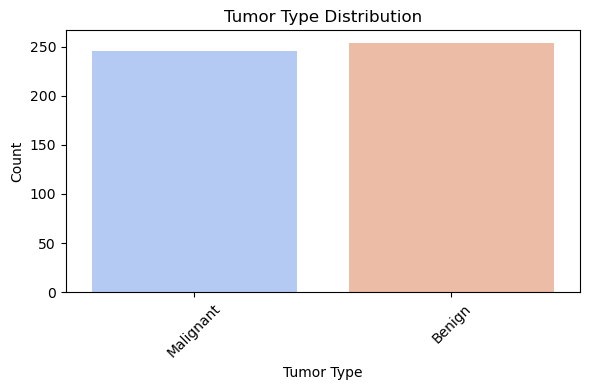

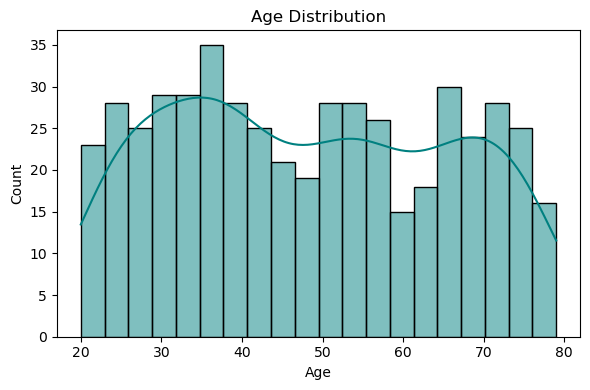

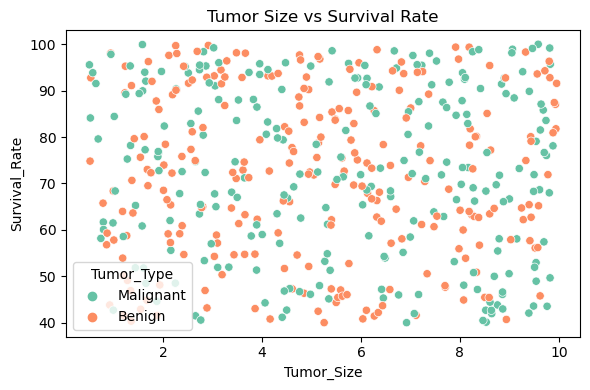

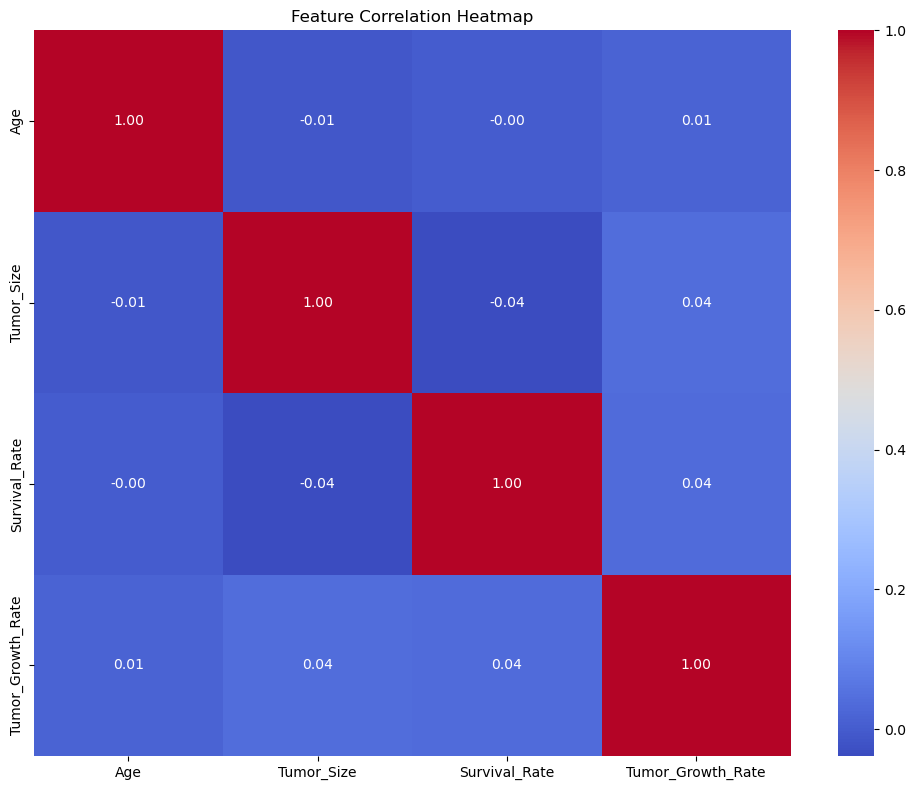

Accuracy: 0.46
Confusion Matrix:
 [[29 25]
 [29 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52        54
           1       0.40      0.37      0.39        46

    accuracy                           0.46       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.46      0.46       100

✅ Model saved as 'random_forest_classifier.pkl'


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load the dataset
 # Make sure this file exists in the same directory

# Drop irrelevant columns
df = df.drop(columns=["MyUnknownColumn", "Patient_ID"])

# ----- EDA (Exploratory Data Analysis) -----

# Plot tumor type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Tumor_Type", palette="coolwarm")
plt.title("Tumor Type Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribution of age
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Tumor Size vs Survival Rate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Tumor_Size", y="Survival_Rate", hue="Tumor_Type", palette="Set2")
plt.title("Tumor Size vs Survival Rate")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# ----- Label Encoding -----
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop("Tumor_Type", axis=1)
y = df["Tumor_Type"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model
with open("random_forest_classifier.pkl", "wb") as f:
    pickle.dump(clf, f)

print("✅ Model saved as 'random_forest_classifier.pkl'")


In [5]:
pwd

'D:\\python_files'